# Data Exploration
## Homework 1

Author: Mariusz Słapek  
Dataset: *Bank marketing*

## Import library

In [2]:
# import all necessary library

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

## Read data and information about attributes

In [6]:
# read data

data = pd.read_csv("bank_marketing_dataset.csv")

In [7]:
# show five rows of the dataset

data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79.0,1,-1.0,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220.0,1,339.0,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185.0,1,330.0,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199.0,4,-1.0,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226.0,1,-1.0,0,unknown,no


In [8]:
data.rename(columns={'housing':'housing_loan',
                     'loan':'personal_loan',
                     'duration': 'last_contact_duration'}, 
            inplace=True)

In [9]:
data.head(5)

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,last_contact_duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79.0,1,-1.0,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220.0,1,339.0,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185.0,1,330.0,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199.0,4,-1.0,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226.0,1,-1.0,0,unknown,no


In [10]:
from typing import List
from sklearn import preprocessing

def label_encoder_list(data: pd.core.frame.DataFrame, column_lists: List) -> pd.core.frame.DataFrame:
    
    le = preprocessing.LabelEncoder()

    for i in column_lists:
        data[i] = le.fit_transform(list(data[i]))
        
    return data

In [37]:
column_lists = ["default", "housing_loan", "personal_loan", "y"]

data = label_encoder_list(data, column_lists)

data.head(5)

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,last_contact_duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79.0,1,-1.0,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220.0,1,339.0,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185.0,1,330.0,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199.0,4,-1.0,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226.0,1,-1.0,0,unknown,0


In [12]:
# read and show data attributes

attributes = pd.read_csv("attributes_bank_marketing.csv")
attributes

,name,type,description
0,age,integer,Age of client: numerical value
1,job,string,"Type of job: admin., blue-collar, entrepreneur..."
2,marital,string,"Marital status: divorced, married, single, unk..."
3,education,string,"Level of education: primary, secondary, tertia..."
4,default,string,"Has credit in default: no, yes, unknown"
5,balance,integer,Average yearly balance in Euro: numerical value
6,housing,string,"Has housing loan: no, yes, unknown"
7,loan,string,"Has personal loan: no, yes, unknown"
8,contact,string,"Communication type: unknown, telephone, cellular"
9,day,integer,Day of the month: numerical value between 1 an...


## Basic information

In [13]:
# only numeric variables, no NaN values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age                      4521 non-null int64
job                      4521 non-null object
marital                  4521 non-null object
education                4521 non-null object
default                  4521 non-null int64
balance                  4521 non-null int64
housing_loan             4521 non-null int64
personal_loan            4521 non-null int64
contact                  4521 non-null object
day                      4521 non-null int64
month                    4521 non-null object
last_contact_duration    4521 non-null float64
campaign                 4521 non-null int64
pdays                    4521 non-null float64
previous                 4521 non-null int64
poutcome                 4521 non-null object
y                        4521 non-null int64
dtypes: float64(2), int64(9), object(6)
memory usage: 600.5+ KB


Dane przedstawiają informacje o klientach banku - ich szczegółowe dane takie jak: wiek, bilans konta, datę ostatniej rozmowy, czy posiadają kredyt (hipoteczny albo fizyczny). Kolumna *poutcome* pokazuje czy ostatnia *kampania* zakończyła się sukcesem czy nie. Kolumna *y* jest odpowiedzią czy klient dokonta subskrypcji.

In [14]:
# only numeric variables, no NaN values
data.describe()

,age,default,balance,housing_loan,personal_loan,day,last_contact_duration,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,0.016810,1422.657819,0.566025,0.152842,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,0.128575,3009.638142,0.495676,0.359875,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,69.000000,0.000000,0.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,444.000000,1.000000,0.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1480.000000,1.000000,0.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,1.000000,71188.000000,1.000000,1.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [15]:
# number of rows and columns
data.shape

(4521, 17)

## Correlation

In [16]:
data.corr()

,age,default,balance,housing_loan,personal_loan,day,last_contact_duration,campaign,pdays,previous,y
age,1.000000,-0.017885,0.083820,-0.193888,-0.011250,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
default,-0.017885,1.000000,-0.070886,0.006881,0.063994,-0.013261,-0.011615,-0.012348,-0.026317,-0.026656,0.001303
balance,0.083820,-0.070886,1.000000,-0.050227,-0.071349,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
housing_loan,-0.193888,0.006881,-0.050227,1.000000,0.018451,-0.031291,0.015740,-0.003574,0.116893,0.038621,-0.104683
personal_loan,-0.011250,0.063994,-0.071349,0.018451,1.000000,-0.004879,-0.004997,0.017120,-0.031086,-0.022115,-0.070517
day,-0.017853,-0.013261,-0.008677,-0.031291,-0.004879,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
last_contact_duration,-0.002367,-0.011615,-0.015950,0.015740,-0.004997,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.012348,-0.009976,-0.003574,0.017120,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,-0.026317,0.009437,0.116893,-0.031086,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,-0.026656,0.026196,0.038621,-0.022115,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714


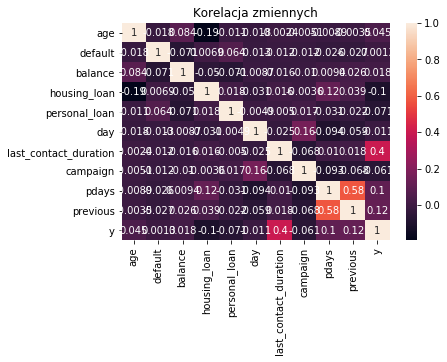

In [17]:
corr = data.corr()

ax=sns.heatmap(corr,
               xticklabels=corr.columns,
               yticklabels=corr.columns,
               annot=True)

ax.set_title('Korelacja zmiennych')
plt.show()

## Plots - szukanie ciekawych zależności

### Bilans konta a wiek

Rozkład stanu konta w zależności od wieku może być ciekawą przesłanką. Czy kredyt biorą tylko ludzie młodzi? Czy w zależności od wieku rośnie zamożnośći? Jak tom sie rozkłada w poszczególnych grupach wiekowych?

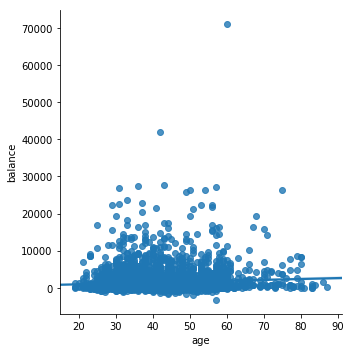

In [18]:
sns.lmplot(x='age', y='balance', data=data)


Widzimy, iż saldo na koncie delikatnie wzrasta w zależności od wieku (co wydaje się dość oczewiste - większe doświadczenie, większe oszczędności).

### Czy wpływ na to ma wiek?

In [44]:
print(data.columns)
type(data)

Index(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing_loan', 'personal_loan', 'contact', 'day', 'month',
       'last_contact_duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')


pandas.core.frame.DataFrame

Text(0.5,1,'Age of client where predictor class is "yes"')

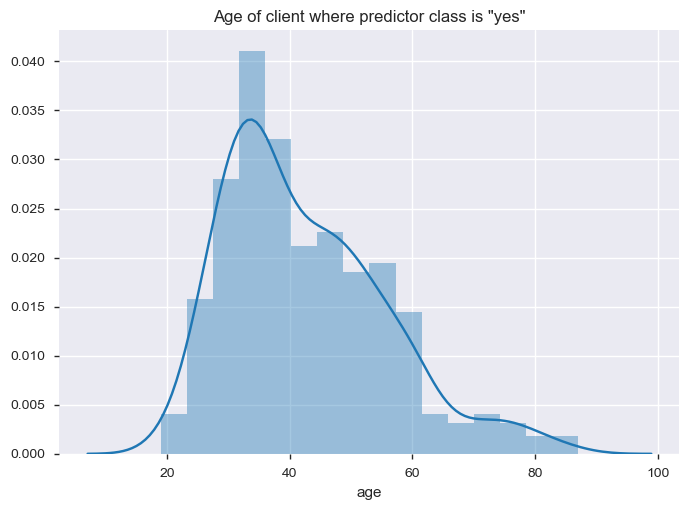

In [48]:
yes_data = data[data.y == 1]
age = sns.distplot(yes_data.age)
age.set_title('Age of client where predictor class is "yes"')

Text(0.5,1,'Age of client where predictor class is "no"')

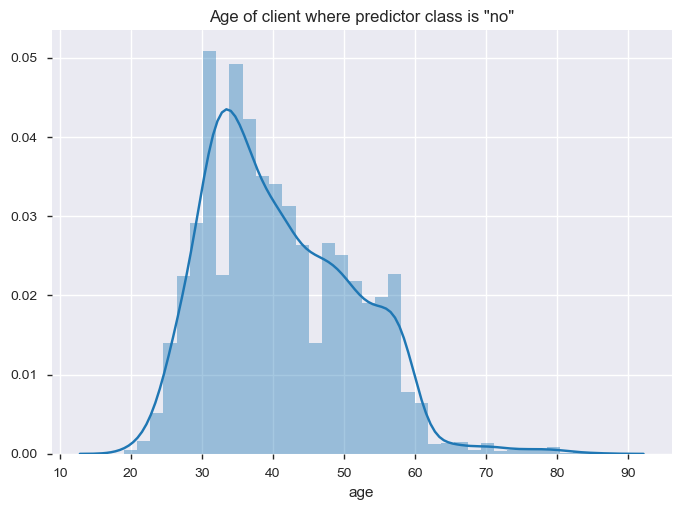

In [49]:
no_data = data[data.y == 0]
age = sns.distplot(no_data.age)
age.set_title('Age of client where predictor class is "no"')

Na podstawie tego wykresu widzimy zarówno odpowiedzi *no* or *yes* są niezależne od wieku.

### Pożyczka a subskrypcja?

A jak wygląda ta sytuacja dla ludzi, którzy wzięli pożycze hipoteczną albo po prostu pożyczkę?

In [50]:
yes_data = data[data.y == 1]
no_data = data[data.y == 0]
print('Value counts where predictor is "yes": \n' + str(yes_data.housing_loan.value_counts()))
print('Value counts where predictor is "no ": \n' + str(no_data.housing_loan.value_counts()))

Value counts where predictor is "yes": 
0    301
1    220
Name: housing_loan, dtype: int64
Value counts where predictor is "no ": 
1    2339
0    1661
Name: housing_loan, dtype: int64


In [51]:
print('Value counts where predictor is "yes": \n' + str(yes_data.personal_loan.value_counts()))
print('Value counts where predictor is "no ": \n' + str(no_data.personal_loan.value_counts()))

Value counts where predictor is "yes": 
0    478
1     43
Name: personal_loan, dtype: int64
Value counts where predictor is "no ": 
0    3352
1     648
Name: personal_loan, dtype: int64


### Liczba przypadków a zawód, stan materialny...

In [23]:
# selecting categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'contact', 'month', 'day', 'poutcome', 'y']
# changing column type to 'category'
for column in categorical_columns:
    data[column] = data[column].astype('category')


Liczba odbiorców w zależności od pozycji zajmowanej w pracy


Jak widzimy niektóre prace mogą być połączone w jedno, np.:
* unemplyed
* retired

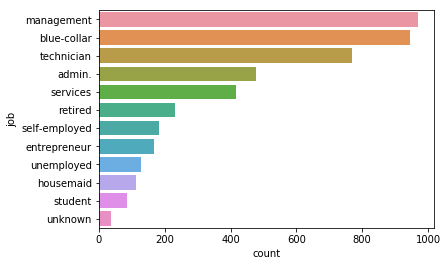

In [24]:
sns.countplot(y='job', data=data, order = data['job'].value_counts().index)
plt.show()

Liczba odbiorców w zależności od stanu cywilnego

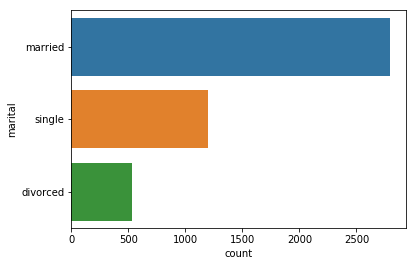

In [25]:
sns.countplot(y='marital', data=data, order = data['marital'].value_counts().index)
plt.show()

Liczba odbiorców w zależności od sposobu kontaktu

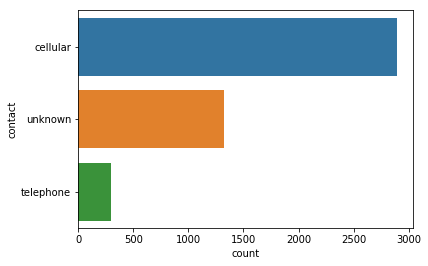

In [26]:
sns.countplot(y='contact', data=data, order = data['contact'].value_counts().index)
plt.show()

Liczba odbiorców w zależności od miesiąca

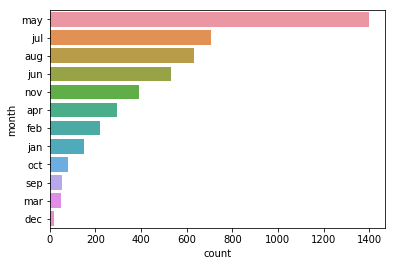

In [27]:
sns.countplot(y='month', data=data, order = data['month'].value_counts().index)
plt.show()

Liczba odbiorców w zależności od odpowiedzi (tak - 1 lub nie - 0)

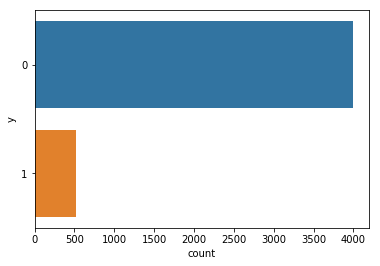

In [28]:
sns.countplot(y='y', data=data, order = data['y'].value_counts().index)
plt.show()

Liczba odbiorców w zależności od wykształcenia.

Jak widzimy cel nie został tylko skierowany na osoby wysoko wykształcone.

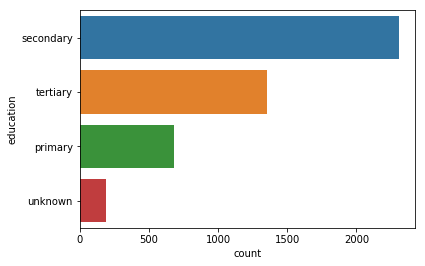

In [29]:
sns.countplot(y='education', data=data, order = data['education'].value_counts().index)
plt.show()

### Numerical variable - dystrybucja

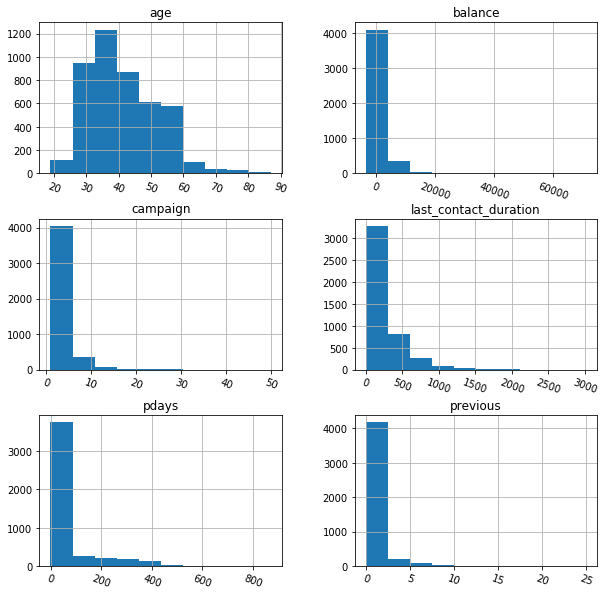

In [30]:
#Histogram grid
data.hist(figsize=(10,10), xrot=-20)
#Clear the text "residue"
plt.show()

### Korelacje - calculate correlations between numeric features


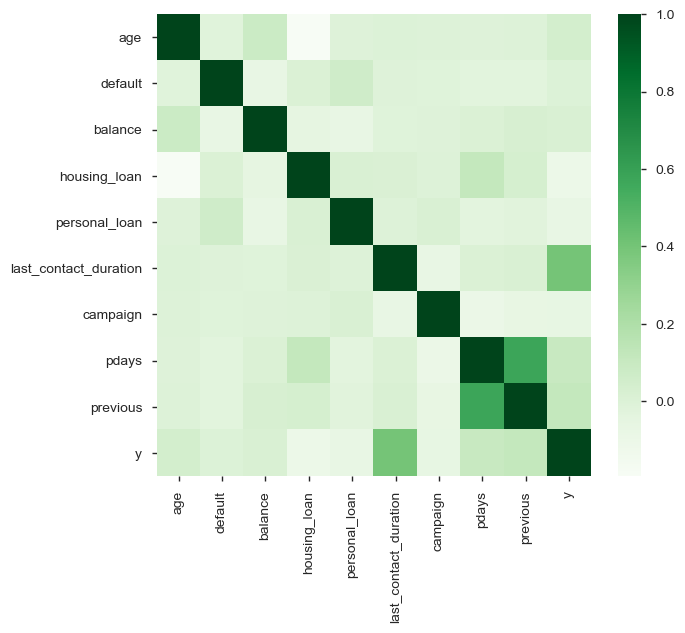

In [52]:
correlations = data.corr()
plt.figure(figsize=(7,6))
sns.heatmap(correlations, cmap="Greens")

### Czy jeśli klient wcześniej lokowal lokatę ma to wpływ na teraźniejszą decyzję?

In [56]:
data.groupby(["poutcome", "y"]).size()

poutcome  y
failure   0     427
          1      63
other     0     159
          1      38
success   0      46
          1      83
unknown   0    3368
          1     337
dtype: int64

Wyraźnie widzimy, iż osoby, które wcześniej wzięli lokatę znacznie częściej brali lokatę niż osoby, które nie korzystał wcześniej z tej usługi.

### Może długość rozmowy wpływa na wzięcie lokaty?

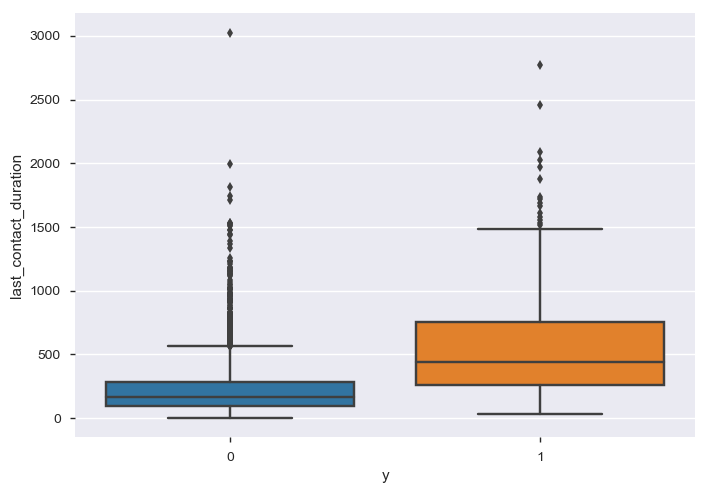

In [59]:
sns.boxplot(x='y', y='last_contact_duration', data=data)

Niby tak, ale wg mnie to dość oczewiste.
Klienci, którzy są zainteresowani dłużej rozmawiają by poznać bardziej szczegółowe informacje. 

Osoby, które od razu wiedzą, że nie chcą kontynuować współpracy nie będą rozmawiali długo.

## Automatyczne narzędzia

Wady:  
* wykresy są często nieczytelne  
* przedstawione są tylko podstawowe zależności
* niektóre typy zmiennych są źle odczytywane
* brak sprawdzenia związków między związkami kategorycznymi
* ubogie analizy

Zalety:
* dobrze się sprawdza przy wstępnej analizie danych
* daje informacje o wartościach brakujących 
* podstawowe informacje na temat korelacji pomiędzy zmiennymi
* dowiadujemy się czy istnieją jakieś duplikaty danych
* prostota

In [34]:
profile = ProfileReport(data)
profile

Number of variables,17
Number of observations,4521
Total Missing (%),0.0%
Total size in memory,263.8 KiB
Average record size in memory,59.8 B
Numeric,6
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,0
